# ASSIGNMENT 5
# CSE4076 - Image and Video Analytics

VISHALI SHARMA (21MIA1066)


Load Video:

Load the provided video using OpenCV.

Image loaded successfully!


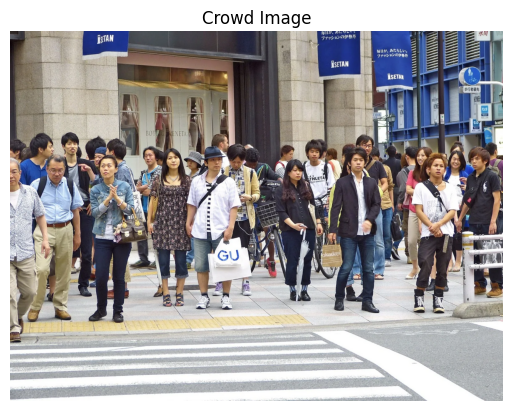

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/crowd_pic.webp")

# Check if the image is loaded properly
if image is not None:
    print("Image loaded successfully!")
else:
    print("Error loading image.")

# Convert to RGB for display using matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title('Crowd Image')
plt.axis('off')
plt.show()


2. Preprocessing

We need to perform face detection and hand gesture detection using basic techniques.

Face Detection using Skin-Color-Based Detection

We can use a color threshold in the HSV (Hue, Saturation, Value) color space to detect skin tones.

A simple approach for detecting hand gestures would involve detecting contours that match the expected shape of hands or using similar thresholding.

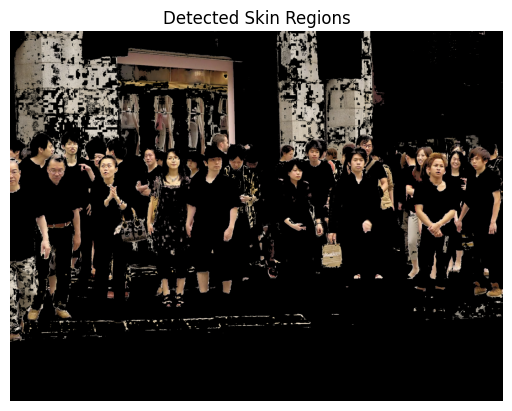

In [4]:
def skin_color_detection(image):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for skin color in HSV
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask using the bounds
    mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    # Apply the mask to extract skin regions
    skin = cv2.bitwise_and(image, image, mask=mask)

    return skin

# Apply skin detection
skin_regions = skin_color_detection(image)

# Display detected skin regions
plt.imshow(cv2.cvtColor(skin_regions, cv2.COLOR_BGR2RGB))
plt.title('Detected Skin Regions')
plt.axis('off')
plt.show()


Step 2: Face and Feature Detection for All Faces in the Crowd
    
We will modify the code to detect multiple faces, extract features (eyes and mouth) for each face, and classify the emotion of each individual.

Number of faces detected: 8


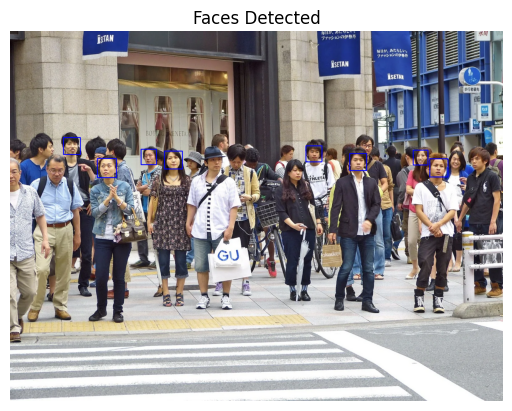

In [5]:

# Load pre-trained Haar Cascade Classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

def detect_faces_and_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    detected_faces = []
    for (x, y, w, h) in faces:
        # Draw rectangle around each face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Focus on face region for detecting eyes and mouth
        face_region = gray[y:y+h, x:x+w]
        color_face_region = image[y:y+h, x:x+w]

        # Detect eyes
        eyes = eye_cascade.detectMultiScale(face_region)
        # Detect mouth (smile)
        mouth = mouth_cascade.detectMultiScale(face_region, 1.7, 22)

        # Append face features (eyes and mouth) for later emotion classification
        detected_faces.append((eyes, mouth))

    return detected_faces

# Detect all faces and their features (eyes and mouth)
faces_features = detect_faces_and_features(image)

# Print how many faces were detected
print(f"Number of faces detected: {len(faces_features)}")

# Display the image with rectangles around detected faces
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Faces Detected')
plt.axis('off')
plt.show()


Step 3: Classify Emotion for Each Face
    
For each detected face, we classify emotions based on the presence of a smile (mouth) and print the result for each individual.

In [6]:
def classify_emotion(eyes, mouth):
    # Classify as happy if mouth width is large (indicating a smile)
    if len(mouth) > 0:
        (mx, my, mw, mh) = mouth[0]
        mouth_aspect_ratio = mw / mh

        if mouth_aspect_ratio > 2.5:  # Larger aspect ratio means smile
            print("Smile detected! Classifying as happy.")
            return 'happy'
        elif mouth_aspect_ratio < 1.8:  # Smaller ratio, frown-like mouth
            print("Downward curve detected. Classifying as sad.")
            return 'sad'
        else:
            print("Neutral or slight curve detected. Classifying as annoyed.")
            return 'annoyed'
    else:
        # No mouth detected; assume neutral or annoyed based on eyes
        print("No smile detected. Checking eyes for other emotions.")
        if len(eyes) > 0:
            # Simple heuristic: smaller eye aspect ratio can indicate annoyance (narrowed eyes)
            (ex, ey, ew, eh) = eyes[0]
            eye_aspect_ratio = ew / eh
            if eye_aspect_ratio < 1.8:  # Smaller eye aspect ratio (narrow eyes)
                print("Narrow eyes detected. Classifying as annoyed.")
                return 'annoyed'
            else:
                print("Eyes wide open. Classifying as neutral.")
                return 'neutral'
        else:
            print("No eyes detected. Defaulting to neutral.")
            return 'neutral'


Step 4: Overall Sentiment Calculation
    
Once all emotions are detected, we'll calculate the overall sentiment based on the majority emotion.

In [7]:
# Classify emotions for all detected faces using refined rules
emotions = []
for eyes, mouth in faces_features:
    emotion = classify_emotion(eyes, mouth)
    emotions.append(emotion)

# Print detected emotions for each person
for i, emotion in enumerate(emotions, 1):
    print(f"Person {i}: {emotion}")


No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
No smile detected. Checking eyes for other emotions.
No eyes detected. Defaulting to neutral.
Person 1: neutral
Person 2: neutral
Person 3: neutral
Person 4: neutral
Person 5: neutral
Person 6: neutral
Person 7: neutral
Person 8: neutral


In [8]:
def categorize_crowd(emotions):
    # Count each emotion
    happy_count = emotions.count('happy')
    sad_count = emotions.count('sad')
    annoyed_count = emotions.count('annoyed')
    neutral_count = emotions.count('neutral')

    # Determine majority sentiment based on counts
    if happy_count > sad_count and happy_count > annoyed_count and happy_count > neutral_count:
        print("Majority of the crowd is happy.")
        return 'Majority Happy'
    elif sad_count > happy_count and sad_count > annoyed_count and sad_count > neutral_count:
        print("Majority of the crowd is sad.")
        return 'Majority Sad'
    elif annoyed_count > happy_count and annoyed_count > sad_count and annoyed_count > neutral_count:
        print("Majority of the crowd is annoyed.")
        return 'Majority Annoyed'
    elif neutral_count > happy_count and neutral_count > sad_count and neutral_count > annoyed_count:
        print("Majority of the crowd is neutral.")
        return 'Majority Neutral'
    else:
        # Handle ties by printing that the sentiment is mixed
        print("Crowd sentiment is mixed.")
        return 'Mixed Sentiment'

# Example output based on the provided counts
overall_sentiment = categorize_crowd(emotions)
print(f'Overall crowd sentiment: {overall_sentiment}')


Majority of the crowd is neutral.
Overall crowd sentiment: Majority Neutral


Step 5: Visualize the Results with Annotations

We'll now display the image with the final annotation indicating the overall crowd sentiment.

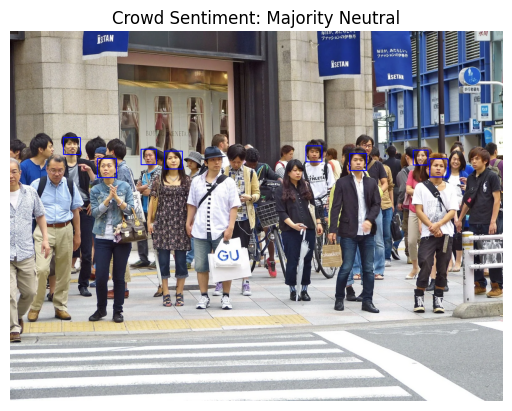

In [9]:
# Display the final image with annotations
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f'Crowd Sentiment: {overall_sentiment}')
plt.axis('off')
plt.show()
